In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, multilabel_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('landmark.csv'
)
# df = df[0].str.split(',', expand=True)
df

,1,2,3,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,Output
0,0.476367,0.353816,5.926383e-07,0.449234,0.432987,-0.027095,0.443237,0.508904,-0.050162,0.439319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
1,0.582900,0.024890,4.294760e-07,0.495858,0.021948,-0.014463,0.428040,0.064142,-0.027092,0.387340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
2,0.593543,0.046800,5.186289e-07,0.508483,0.028019,-0.025900,0.436337,0.054680,-0.046170,0.383537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
3,0.509751,0.404736,1.966143e-07,0.475957,0.473717,-0.021131,0.464124,0.538058,-0.036481,0.455469,...,0.626022,0.421149,-0.065481,0.633794,0.471344,-0.074966,0.644385,0.504347,-0.079752,Gerakan 1
4,0.670381,0.093354,4.045614e-07,0.571721,0.073039,-0.042296,0.472582,0.124671,-0.055009,0.418037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (8004, 126)
Labels shape = (8004,)


In [5]:
#Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [6]:
#Train SVM
#From GridSearchCV:
#{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
#

svm = SVC(C=100, gamma=1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100, gamma=1)

In [7]:
#Make predict
y_pred = svm.predict(x_test)
y_pred

array(['Gerakan 5', 'None', 'None', ..., 'None', 'Gerakan 2', 'Gerakan 4'],
      dtype=object)

In [8]:
#Calculate metrics score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print("Acc = ",accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)

print("=================================================================")
f1_mac = f1_score(y_test, y_pred, average='macro')
recall_mac = recall_score(y_test, y_pred, average='macro')
precision_mac = precision_score(y_test, y_pred, average='macro')
print("Precision macro = ", precision_mac)
print("Recall macro = ", recall_mac)
print("F1 macro = ", f1_mac)

Acc =  0.7726420986883198
Precision =  0.7726420986883198
Recall =  0.7726420986883198
F1 =  0.7726420986883198
Precision macro =  0.8906930769462281
Recall macro =  0.7714417701832232
F1 macro =  0.7916788538394784


In [9]:
cf_matrix = confusion_matrix(y_test, y_pred)
multilabel_confusion_matrix(y_test, y_pred)

array([[[1355,    5],
        [  33,  208]],

       [[1366,    1],
        [   9,  225]],

       [[1343,   13],
        [  66,  179]],

       [[1367,    7],
        [  92,  135]],

       [[1409,    3],
        [  46,  143]],

       [[1367,    1],
        [ 117,  116]],

       [[1035,  334],
        [   1,  231]]])

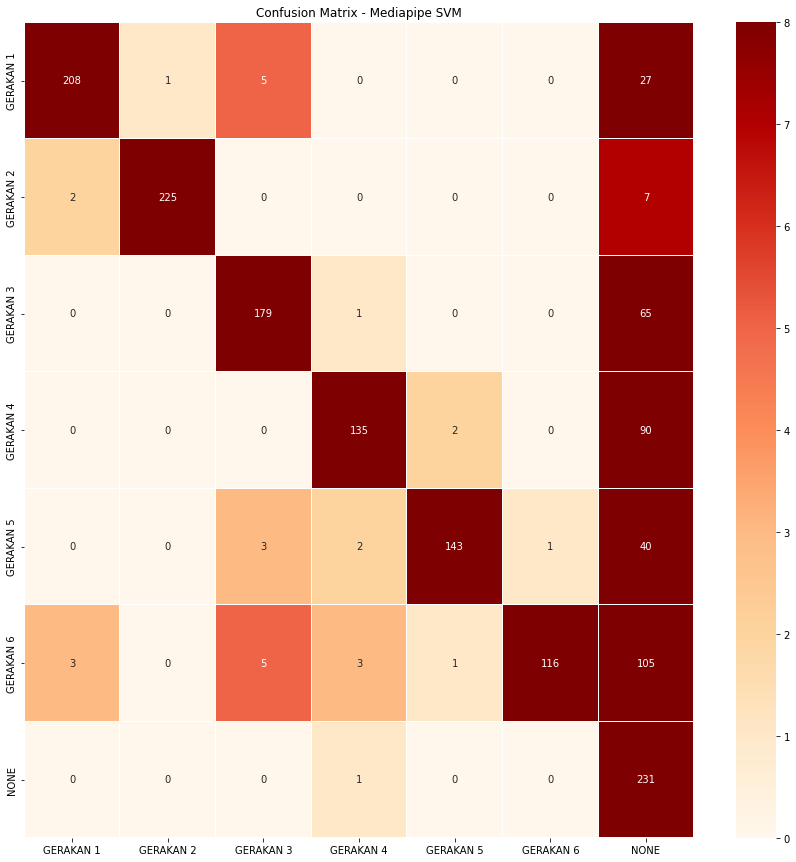

In [12]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_title("Confusion Matrix - Mediapipe SVM")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.OrRd, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [13]:
import pickle

# save model
with open('MediaSvm1.pkl','wb') as f:
    pickle.dump(svm,f)